<a href="https://colab.research.google.com/github/drewmanley16/drewmanley16/blob/main/Quant_Vasicek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

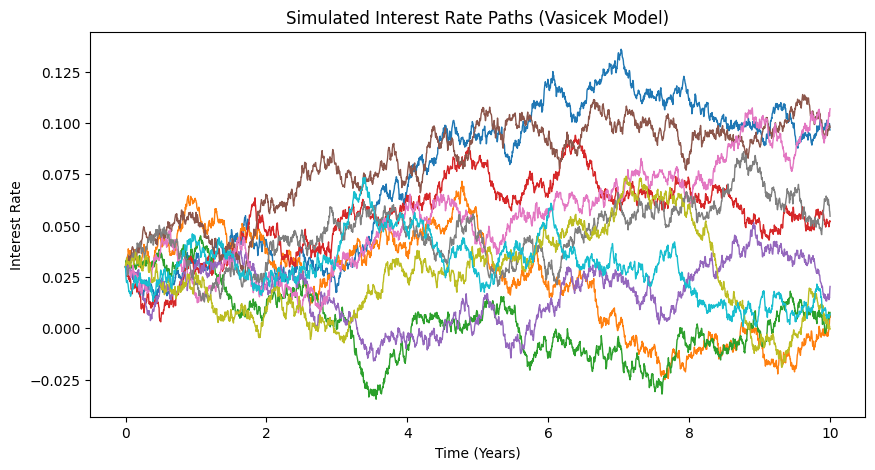

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vasicek model parameters
theta = 0.15   # Speed of mean reversion
mu = 0.05      # Long-term mean interest rate (5%)
sigma = 0.02   # Volatility (2%)
r0 = 0.03      # Initial interest rate (3%)
T = 10         # Simulation period in years
dt = 1/252     # Time step (daily steps assuming 252 trading days per year)
N = int(T / dt)  # Number of time steps
simulations = 10 # Number of simulated interest rate paths

# Simulate interest rate paths
np.random.seed(42)
time_grid = np.linspace(0, T, N)
rates = np.zeros((simulations, N))
rates[:, 0] = r0  # Set initial rate

for i in range(simulations):
    for t in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))  # Brownian motion
        rates[i, t] = rates[i, t-1] + theta * (mu - rates[i, t-1]) * dt + sigma * dW

# Plot results
plt.figure(figsize=(10,5))
for i in range(simulations):
    plt.plot(time_grid, rates[i], lw=1)
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Simulated Interest Rate Paths (Vasicek Model)")
plt.show()

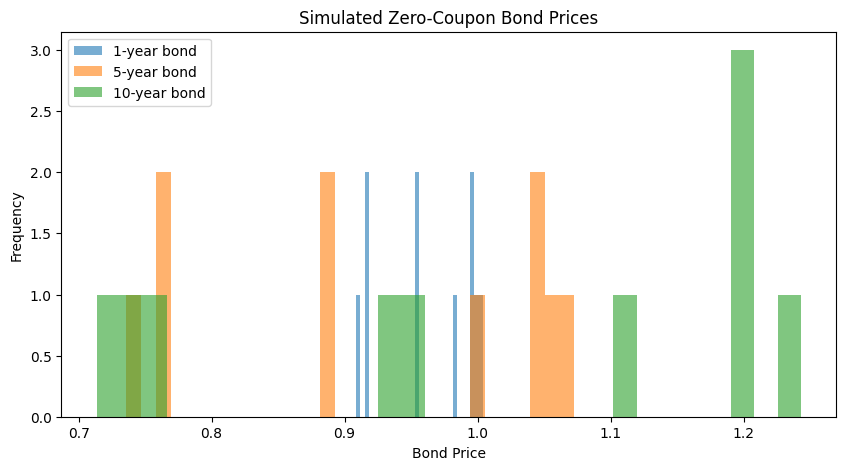

In [2]:
def bond_price(r, T, t, theta, mu, sigma):
    """ Computes the price of a zero-coupon bond using the Vasicek model """
    B = (1 - np.exp(-theta * (T - t))) / theta
    A = (mu - (sigma**2 / (2 * theta**2))) * (B - (T - t)) - (sigma**2 * B**2) / (4 * theta)
    return np.exp(-A - B * r)

# Example: Compute bond prices at different maturities using simulated rates
maturities = [1, 5, 10]  # 1-year, 5-year, 10-year bonds
bond_prices = {T: [] for T in maturities}

for T in maturities:
    for i in range(simulations):
        bond_prices[T].append(bond_price(rates[i, -1], T, 0, theta, mu, sigma))

# Plot bond price distributions
plt.figure(figsize=(10,5))
for T in maturities:
    plt.hist(bond_prices[T], bins=30, alpha=0.6, label=f"{T}-year bond")
plt.xlabel("Bond Price")
plt.ylabel("Frequency")
plt.legend()
plt.title("Simulated Zero-Coupon Bond Prices")
plt.show()

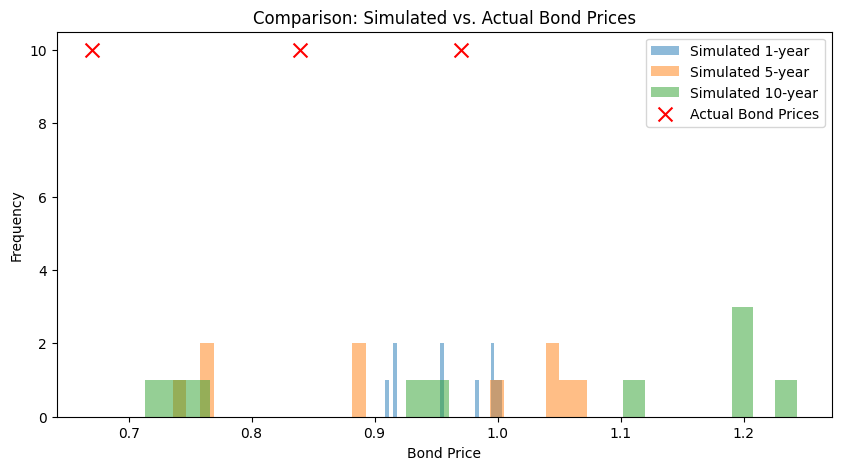

In [3]:
# Example: Using historical Treasury yields
real_rates = [0.03, 0.035, 0.04]  # Example 1-year, 5-year, and 10-year yields
historical_prices = [np.exp(-r*T) for r, T in zip(real_rates, maturities)]

# Plot comparison
plt.figure(figsize=(10,5))
for T in maturities:
    plt.hist(bond_prices[T], bins=30, alpha=0.5, label=f"Simulated {T}-year")
plt.scatter(historical_prices, [10, 10, 10], color='red', label="Actual Bond Prices", marker='x', s=100)
plt.xlabel("Bond Price")
plt.ylabel("Frequency")
plt.legend()
plt.title("Comparison: Simulated vs. Actual Bond Prices")
plt.show()

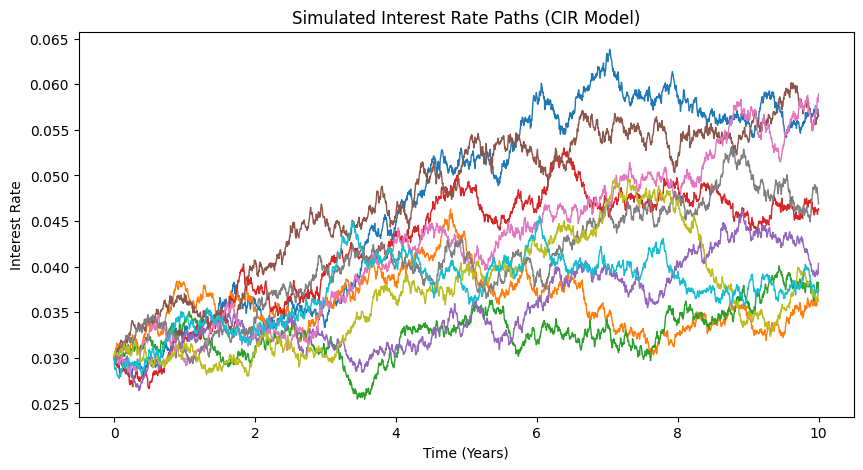

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# CIR model parameters
theta = 0.15   # Speed of mean reversion
mu = 0.05      # Long-term mean rate
sigma = 0.02   # Volatility
r0 = 0.03      # Initial rate
T = 10         # Time in years
dt = 1/252     # Daily time step
N = int(T / dt)
simulations = 10

# Simulate CIR interest rate paths
np.random.seed(42)
time_grid = np.linspace(0, T, N)
rates = np.zeros((simulations, N))
rates[:, 0] = r0

for i in range(simulations):
    for t in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        rates[i, t] = max(rates[i, t-1] + theta * (mu - rates[i, t-1]) * dt + sigma * np.sqrt(rates[i, t-1]) * dW, 0)

# Plot results
plt.figure(figsize=(10,5))
for i in range(simulations):
    plt.plot(time_grid, rates[i], lw=1)
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Simulated Interest Rate Paths (CIR Model)")
plt.show()


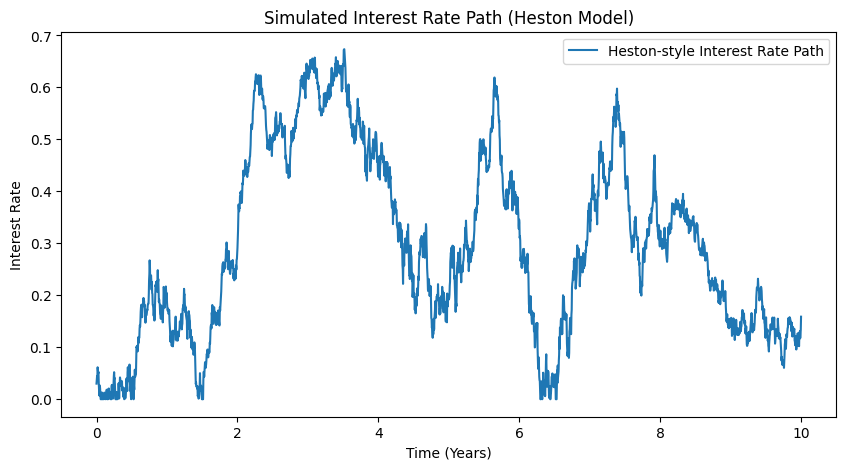

In [5]:
# Heston-style stochastic volatility model for interest rates
kappa = 0.3  # Mean reversion speed for volatility
eta = 0.04   # Long-term variance level
xi = 0.1     # Volatility of volatility
rho = -0.6   # Correlation between rate and volatility shocks

# Initial conditions
r = np.zeros(N)
v = np.zeros(N)
r[0] = r0
v[0] = eta  # Initial variance

np.random.seed(42)
for t in range(1, N):
    dW_r = np.random.normal(0, np.sqrt(dt))
    dW_v = np.random.normal(0, np.sqrt(dt))

    dW_v = rho * dW_r + np.sqrt(1 - rho**2) * dW_v  # Correlated Brownian motions

    v[t] = np.abs(v[t-1] + kappa * (eta - v[t-1]) * dt + xi * np.sqrt(v[t-1]) * dW_v)  # Ensure positivity
    r[t] = max(r[t-1] + theta * (mu - r[t-1]) * dt + np.sqrt(v[t-1]) * dW_r, 0)  # Ensure non-negative rates

# Plot interest rate paths
plt.figure(figsize=(10,5))
plt.plot(time_grid, r, label="Heston-style Interest Rate Path")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Simulated Interest Rate Path (Heston Model)")
plt.legend()
plt.show()

In [6]:
plt.figure(figsize=(10,5))
plt.hist(bond_prices_cir, bins=30, alpha=0.5, label="CIR Model")
plt.hist(bond_prices_heston, bins=30, alpha=0.5, label="Heston Model")
plt.scatter(historical_prices, [10, 10, 10], color='red', marker='x', label="Actual Treasury Prices", s=100)
plt.xlabel("Bond Price")
plt.ylabel("Frequency")
plt.legend()
plt.title("Comparison of Bond Pricing Models")
plt.show()

NameError: name 'bond_prices_cir' is not defined

<Figure size 1000x500 with 0 Axes>

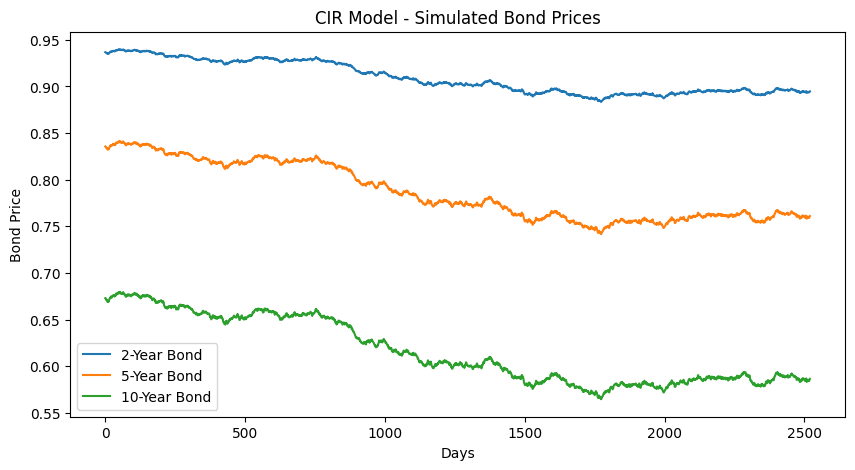

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# CIR Model Parameters
theta = 0.15  # Speed of mean reversion
mu = 0.05  # Long-term mean rate
sigma = 0.02  # Volatility
r0 = 0.03  # Initial short rate
T = 10  # Maturity in years
dt = 1/252  # Daily time step
N = int(T / dt)

# Bond Maturity (e.g., 2Y, 5Y, 10Y Bonds)
maturities = [2, 5, 10]
bond_prices_cir = {m: [] for m in maturities}

# Simulate Interest Rate Paths using CIR
np.random.seed(42)
rates = np.zeros(N)
rates[0] = r0

for t in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt))
    rates[t] = max(rates[t-1] + theta * (mu - rates[t-1]) * dt + sigma * np.sqrt(rates[t-1]) * dW, 0)

# Compute Bond Prices for Different Maturities
for T in maturities:
    tau = T  # Time to maturity
    gamma = np.sqrt(theta**2 + 2*sigma**2)

    B_tau = (1 - np.exp(-theta * tau)) / theta
    A_tau = ((2 * gamma * np.exp((theta + gamma) * tau / 2)) /
             ((theta + gamma) * (np.exp(gamma * tau) - 1) + 2 * gamma)) ** (2 * theta * mu / sigma**2)

    bond_prices_cir[T] = A_tau * np.exp(-B_tau * rates)

# Plot Bond Prices for Different Maturities
plt.figure(figsize=(10,5))
for T in maturities:
    plt.plot(bond_prices_cir[T], label=f"{T}-Year Bond")
plt.xlabel("Days")
plt.ylabel("Bond Price")
plt.title("CIR Model - Simulated Bond Prices")
plt.legend()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Treasury Yield Data (Example CSV from Treasury Website)
df = pd.read_csv("daily-treasury-rates.csv")

# Select Relevant Maturities
df = df[['Date', '2 Yr', '5 Yr', '10 Yr']]
df['Date'] = pd.to_datetime(df['Date'])

# Convert Yields to Prices (Zero-Coupon Approximation)
df['2Y Price'] = np.exp(-df['2 Yr'] / 100 * 2)
df['5Y Price'] = np.exp(-df['5 Yr'] / 100 * 5)
df['10Y Price'] = np.exp(-df['10 Yr'] / 100 * 10)

# Plot Real Bond Prices
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['2Y Price'], label="2-Year Bond")
plt.plot(df['Date'], df['5Y Price'], label="5-Year Bond")
plt.plot(df['Date'], df['10Y Price'], label="10-Year Bond")
plt.xlabel("Date")
plt.ylabel("Bond Price")
plt.title("Real U.S. Treasury Bond Prices")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'daily-treasury-rates.csv'